# seaborn interval for line plot

By default, for the moment, the presented error is the confidence interval, with 95% https://seaborn.pydata.org/generated/seaborn.lineplot.html

Also possible to represent standard deviation, standard error or percentile interval https://seaborn.pydata.org/tutorial/error_bars.html


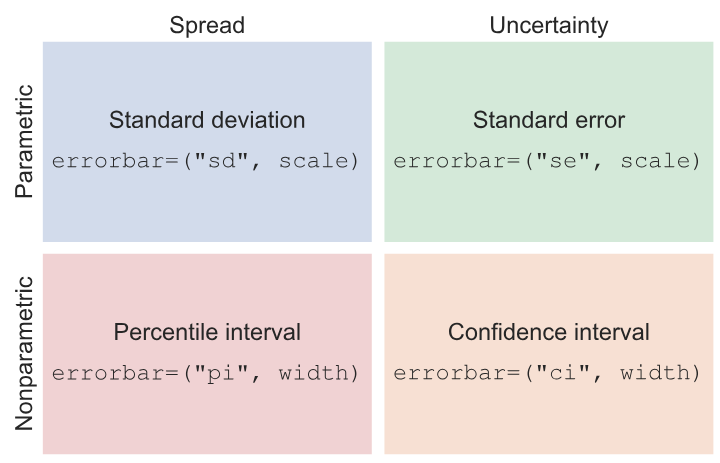

seabor possible to use an estimator to aggregate
https://seaborn.pydata.org/generated/seaborn.lineplot.html

In [ ]:
# boxplots to compare models between each others with observation

In [ ]:
# without outliers
def boxplots_comp_obs_model(climate_var,df_obs,source_obs,df_model,source_model):
    # find column name of interest
    df_obs['Model'] = 'Observation from ' +source_obs
    
    df_boxplot = pd.concat([df_obs,df_model])
    
    fig,ax=plt.subplots()
    plt.tight_layout() # Adjust the padding between and around subplots.

    cols = ['pink' if (x =='Observation from Gorongosa') else 'skyblue' for x in df_boxplot.Model.drop_duplicates().values]
    sns.boxplot(data=df_boxplot,x=df_boxplot.Model, y='Mean of the daily precipitation rate mm_per_day', fliersize=0,palette=cols,ax=ax)

    # display the legend
    #handles, labels=ax.get_legend_handles_labels()
    #fig.legend(handles, labels, loc='upper right', ncol=1, bbox_to_anchor=(1.3, 1),title='Legend')
    #ax.get_legend().remove() # this line permits to have a common legend for the boxplots and the line
    ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
    plt.ylim((0,10))
    plt.title('Compare observation for precipitation average from Gorongosa,\n with modeled data by NEX-GDDP-CMIP6, between '+str(start_year_hist)+' and '+str(stop_year_hist))
    path_figure=r'C:\Users\CLMRX\OneDrive - COWI\Documents\GitHub\CRVA_tool\outputs\figures\Boxplots_without_outliers_Comp_hist_m_o_pr.png'
    plt.savefig(path_figure,format ='png') # savefig or save text must be before plt.show. for savefig, format should be explicity written

    plt.show()

In [ ]:
# trends_month

In [ ]:
# data_1 : first set of data to be used, should only contains the location of interest
# source_1 : source of the first set of data
# data_2 : second set of dat to be used, should only contains the location of interest
# source_2 : source of the second set of data

def trends_month(climate_var,data_1,source_1,data_2,source_2,stats,location,temporal_resolution='Month',start_year_line=1970,stop_year_line=2014,start_year_boxplot=2015,stop_year_boxplot=2100):
    
    (climate_var_longName,climate_var,unit)= infos_str(climate_var,temporal_resolution)
    
    # define the new common name, that will be used as y_axis for boxplots and line
    new_name_col = temporal_resolution+'ly '+climate_var_longName+' '+unit
    
    if 'NEX-GDDP-CMIP6' in source_1:
        if (start_year_boxplot!=2014) or (stop_year_boxplot!=2100):
            data_1=data_1[data_1['Year'].between(start_year_boxplot,stop_year_boxplot)]
        data_boxplot=prepare_NEX_GDDP_CMIP6(data_1,climate_var_longName,stats,temporal_resolution,new_name_col)
        return data_boxplot
        source_boxplot=source_1
    if 'NEX-GDDP-CMIP6' in source_2:
        if (start_year_boxplot!=2014) or (stop_year_boxplot!=2100):
            data_2=data_2[data_2['Year'].between(start_year_boxplot,stop_year_boxplot)]
        data_boxplot=prepare_NEX_GDDP_CMIP6(data_2,climate_var_longName,stats,temporal_resolution,new_name_col)
        source_boxplot=source_2
    if 'NOAA' in source_1:
        if (start_year_line!=1970) or (stop_year_line!=2014):
            data_1=data_1[data_1['Year'].between(start_year_line,stop_year_line)]
        title_column=title_column_NOAA_obs(source_1,climate_var)
        data_line=prepare_NOAA(data_1,title_column,temporal_resolution,new_name_col)
        source_line=source_1
    if 'NOAA' in source_2:
        if (start_year_line!=1970) or (stop_year_line!=2014):
            data_2=data_2[data_2['Year'].between(start_year_line,stop_year_line)]
        title_column=title_column_NOAA_obs(source_2,climate_var)
        data_line=prepare_NOAA(data_2,title_column,temporal_resolution,new_name_col)
        source_line=source_2
    return data_boxplot
    if temporal_resolution == 'Month': # to plot the data in the chronological order of the months
        month_order = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
        data_boxplot=data_boxplot.reset_index().set_index(temporal_resolution).loc[month_order].reset_index()
        data_line=data_line.reset_index().set_index(temporal_resolution).loc[month_order].reset_index()    
    
    if stats == 'Sum':
        title_plot = climate_var_longName+' '+unit+', modeled by '+source_boxplot+',\nbetween '+str(start_year_boxplot)+' and '+str(stop_year_boxplot)+' at '+location+' compared with '+source_line+'\nobservation data, between '+str(start_year_line)+' and '+str(stop_year_line)
    else:
        title_plot = stats+' '+climate_var_longName+' '+unit+', modeled by '+source_boxplot+',\nbetween '+str(start_year_boxplot)+' and '+str(stop_year_boxplot)+' at '+location+' compared with '+source_line+'\nobservation data, between '+str(start_year_line)+' and '+str(stop_year_line)
        
    boxplots_line(data_boxplot,data_line,temporal_resolution,new_name_col,source_line,title_plot)

In [ ]:
# data_boxplot : dataframr that will be used to do the boxplots
# data_line : dataframe that will be used to add a line
# x_axis : Name of the column that wil be used for the x_axis
# y_axis : Name of the column that wil be used for the y_axis
# ----> x_axis and y_axis are both a str, and both should be used as name of colum in the dataframes for the boxplots and 
#       the line
# source_line : name of the source of the data plot in the line
# title_plot : title for this plot. Should be defined in the function before
# categories : default parameters, will be used for the hue of the boxplot. The hue is a third dimension along a depth axis, 
#              where different levels are plotted with different colors

#stats+' monthly precipitation mm/month between '+start_year+' and '+stop_year+'\n with '+source_obs+' observed data and '+source_model+' modeled data, at '+location

def boxplots_line(data_boxplot,data_line,x_axis,y_axis,source_line,title_plot,categories='Experiment'):
    fig,ax=plt.subplots()
    sns.boxplot(data=data_boxplot, x=x_axis, y=y_axis, hue=categories,ax=ax)
    ax.get_legend().remove() # this line permits to have a common legend for the boxplots and the line
    sns.lineplot(data=data_line,x=x_axis, y=y_axis,ax=ax,label=source_line)
    
    # display the common legend for the line and boxplots
    handles, labels=ax.get_legend_handles_labels()
    fig.legend(handles, labels, loc='upper right', ncol=1, bbox_to_anchor=(1.2, 0.5),title='Legend')
    ax.get_legend().remove() # this line permits to have a common legend for the boxplots and the line
    plt.title(title_plot)
    path_figure=os.path.join(r'C:\Users\CLMRX\OneDrive - COWI\Documents\GitHub\CRVA_tool\outputs\figures','trend_month.png')
    plt.savefig(path_figure,format ='png') # savefig or save text must be before plt.show. for savefig, format should be explicity written

    plt.show()

In [ ]:
def prepare_NOAA(df_NOAA,title_column,temporal_resolution,new_name_col):
    df_NOAA = df_NOAA.reset_index()
    df = df_NOAA[[title_column,temporal_resolution]].groupby(temporal_resolution).mean().rename(columns={title_column:new_name_col}).reset_index()
    
    print('title_column '+title_column)
    print('temporal_resolution '+temporal_resolution)
    
    
    if 'PR' in title_column and temporal_resolution=='Month':
        print('pr and month, multiplication by 30')
        df[new_name_col] = df[[new_name_col]].values*30
    
    return df

In [ ]:
def prepare_NEX_GDDP_CMIP6(df,climate_var_longName,stats,temporal_resolution,new_name_col):
    try:
        try:
            title_column=df.filter(like=climate_var_longName, axis=1).columns[0]
        except:
            title_column=df.filter(like=climate_var_longName.capitalize(), axis=1).columns[0]
    except:
        title_column=df.filter(like=climate_var_longName.upper(), axis=1).columns[0]
    print('title_column '+title_column)
    print(df)
    if stats == 'Average':
        data_NEXGDDPCMIP6=df[['Experiment','Model',temporal_resolution,title_column]].groupby(['Experiment','Model',temporal_resolution])[[title_column]].mean().rename(columns={title_column:new_name_col}).reset_index()
        print(temporal_resolution)
        print(data_NEXGDDPCMIP6)
    if stats == 'Sum':
        data_NEXGDDPCMIP6=df[['Experiment','Model',temporal_resolution,title_column]].groupby(['Experiment','Model',temporal_resolution])[[title_column]].sum().rename(columns={title_column:new_name_col}).reset_index()
    if stats == 'Median':
        data_NEXGDDPCMIP6=df[['Experiment','Model',temporal_resolution,title_column]].groupby(['Experiment','Model',temporal_resolution])[[title_column]].median().rename(columns={title_column:new_name_col}).reset_index()
    
    if 'pr' in climate_var_longName.lower() and temporal_resolution =='Month':
        data_NEXGDDPCMIP6[new_name_col] = data_NEXGDDPCMIP6[[new_name_col]].values*30
    print(data_NEXGDDPCMIP6)
    return data_NEXGDDPCMIP6

In [ ]:
def infos_str(climate_var,temporal_resolution):
    if 'pr' in climate_var.lower():
        climate_var_longName = 'precipitation'
        unit='mm/'+temporal_resolution[0].lower()+temporal_resolution[1:len(temporal_resolution)]
        climate_var='pr'
    if 'tas' in climate_var.lower() or 'temp' in climate_var.lower():
        unit=u'\N{DEGREE SIGN}C'
        climate_var_longName = 'temperature'
    if climate_var=='tasmax':
        climate_var_longName = 'Daily Maximum Near-Surface Air Temperature '
    if climate_var=='tasmin':
        climate_var_longName = 'Daily Minimum Near-Surface Air Temperature '
    return climate_var_longName,climate_var,unit

In [ ]:
def title_column_NOAA_obs(source,climate_var):
    if source == 'NOAA':
        if 'pr' in climate_var:
            title_column='PRCP'
        if climate_var=='tas':
            title_column='TAVG'
        if climate_var=='tasmax':
            title_column='TMAX'
        if climate_var=='tasmin':
            title_column='TMIN'
        return title_column

In [ ]:
# CDF

In [ ]:
def cdf_plot(df,title_column,what_is_plot,y_start,y_stop,source_data,location_data,type_):
    if 'projection' in type_.lower().
        df_historical = df[df['Experiment']=='historical'].sort_values(title_column,na_position='first').dropna()
        df_historical['CDF'] = np.arange(len(df_historical)) / float(len(df_historical))

        df_ssp126 = tas_yearly_avg[tas_yearly_avg['Experiment']=='ssp126'].sort_values(title_column,na_position='first').dropna()
        df_ssp126['CDF'] = np.arange(len(df_ssp126)) / float(len(df_ssp126))

        df_ssp245 = tas_yearly_avg[tas_yearly_avg['Experiment']=='ssp245'].sort_values(title_column,na_position='first').dropna()
        df_ssp245['CDF'] = np.arange(len(df_ssp245)) / float(len(df_ssp245))

        df_ssp370 = tas_yearly_avg[tas_yearly_avg['Experiment']=='ssp370'].sort_values(title_column,na_position='first').dropna()
        df_ssp370['CDF'] = np.arange(len(df_ssp370)) / float(len(df_ssp370))

        df_ssp585 = tas_yearly_avg[tas_yearly_avg['Experiment']=='ssp585'].sort_values(title_column,na_position='first').dropna()
        df_ssp585['CDF'] = np.arange(len(df_ssp585)) / float(len(df_ssp585))

        df_lines = pd.concat([df_historical,df_ssp126,df_ssp245,df_ssp370,df_ssp585])

        fig,ax=plt.subplots()
        sns.lineplot(data=df_lines,x=title_column,y='CDF',hue='Experiment',errorbar =('pi',80))
        handles, labels=ax.get_legend_handles_labels()
        fig.legend(handles, labels, loc='upper right', ncol=1, bbox_to_anchor=(1.1, 0.6),title='Legend')
        ax.get_legend().remove() # this line permits to have a common legend for the boxplots and the line
        plt.ylabel('Cumulative distribution function')
        plt.title('Cumulative distribution function of the '+what_is_plot+',\ndepending on scenario accross models, between '+y_start+' to '+y_stop+' at\n'+location_data+', data modeled with '+source_data)        
        plt.title('Cumulative distribution function of the yearly average temperature,\ndepending on scenario and accross models, between 1950 to 2100 at\nMutua, MZ, data modeled with NEX-GDDP-CMIP6')
        
    if 'observation' in type_.lower():
        df_obs = df.sort_values(title_column,na_position='first').dropna()
        df_obs['CDF'] = np.arange(len(df_obs)) / float(len(df_obs))
    
        fig,ax=plt.subplots()
        sns.lineplot(data=df_obs,x=title_column,y='CDF',hue='Experiment',errorbar =('pi',80))
        plt.ylabel('Cumulative distribution function')
        plt.title('Cumulative distribution function of the '+what_is_plot+',\naccross models, between '+y_start+' to '+y_stop+' at\n'+location_data+', data modeled with '+source_data)